## Phase - 2: Predicting Anomalies in Network Traffic (A Binary Classification problem)

### Problem Statement

- The main goal in this phase is to experiment and find what network size is needed to 'overfit' the entire dataset at your hand.
- In other words, we want to determine how big architecture we need to overfit the data. 
- The place to start is to use 'logistic regression' model and train for as many epochs as needed to obtain as high accuracy as possible. After training hundreds of epochs if you observe that the accuracy is not increasing then it implies that the number of neurons in your model (only one) may not be sufficient for overfitting. 
- The next step is to grow your model into a multi-layer model and add a few neurons (say only 2) in the input layer. This way your model will have '2 + 1 = 3' neurons in total. 
- If your accuracy still does not each a 100% or close to 100% you can continue to increase the number of layers and number of neurons. Once you have obtained 100% accuracy (or around 100%) your experiments for this phase are complete. - The results of this experiment also inform us that our final model (in subsequent phases) should be smaller than this model. Small here refers to number of layers and number of neurons in each layer.

[BONUS] You will be eligible to receive up to 2 bonus points if you complete this phase without using the Keras/Tenforflow library, i.e., if you implement your own Python code to build neural network (or logistic regression model) and code a function that serves as an optimizer (for example, gradient descent algorithm) to train your model.

### Approach

- This phase-2 of the "Predicting Anamolies in Network Traffic" is a continuation to the phase-1 of the project which can be found here - https://github.com/reshma2303/AI5300/tree/main/phase-1-data-analysis
- In this phase - 2, below things will be accomplished as requested in the above problem statement:
    - Step-1: Using ENTIRE dataset to "OVERFIT" the model using vannila (single neuron) logistic regression model to reach accuracy 100% or close to 10%
    - Step-2: If the accuracy did not reach 100%, then a bigger architecture model will be designed and modeled to achieve accuracy of 100% or close to 100%.
        

        
  NOTE: 
  
    - The detailed analysis of the dataset is covered in the phase-1 of the project.
    - As requested in the problem statement, entire dataset will be used to overfit the model and no shuffling or train-test split will happen as these steps are covered in subsequent phases of the project
    

### 1. Data Load and Pre-Processing required for modeling

#### Categorical Columns

'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login'

In [3]:
catg_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

#### Continuous Columns

In [4]:
cont_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

#### Target Variable

The target variable "label" contains all different types of malware attacks and also the value "normal" (i.e., not an attack) as shown below.

'normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'

All malware attacks are grouped (transformed) to the value "abnormal" to make this problem a binary classification problem instead of a multi-class classification.


In [5]:
target_variable = 'label'

#### Data Load

In [6]:
import pandas as pd
df = pd.read_csv("../datasets/kddcup99_csv.csv")

#### Dataset size

In [7]:
df.shape

(494020, 42)

494020 records with 41 features and 1 target variable ("label") for prediction

In [8]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


As seen above, there are various type of malware attacks which can be grouped as "abnormal" to make this problem as binary classification problem

##### Group all malware attacks as "abnormal"

In [9]:
attack_types = list(df['label'].unique())
attack_types.remove('normal') # remove normal from attack types as we only want malware attacks to convert as abnormal

In [10]:
df['label'] = df['label'].replace(attack_types, 'abnormal')
df.shape

(494020, 42)

In [11]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

In [12]:
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land               int64
logged_in          int64
is_host_login      int64
is_guest_login     int64
dtype: object

As seen from the above datatypes of the categorical columns,the column values are not strings. We need to convert them to string before performing any analysis

##### Fixing the data types of categorical columns

In [13]:
df['protocol_type'] = df['protocol_type'].astype(str)
df['service'] = df['service'].astype(str)
df['flag'] = df['flag'].astype(str)
df['land'] = df['land'].astype(str)
df['logged_in'] = df['logged_in'].astype(str)
df['is_host_login'] = df['is_host_login'].astype(str)
df['is_guest_login'] = df['is_guest_login'].astype(str)
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land              object
logged_in         object
is_host_login     object
is_guest_login    object
dtype: object

In [14]:
df.drop(columns=['is_host_login'], inplace=True)
df.drop(columns=['num_outbound_cmds'], inplace=True)

### Transform Target Binary label to 0 and 1

In [15]:
df['label'] = df['label'].map({'normal': 1, 'abnormal': 0})
df['label'].value_counts()

0    396743
1     97277
Name: label, dtype: int64

### One hot encode categorical columns

In [16]:
def convert_categorical_to_one_hot_encoding(dataset, column_name):
    dummy_values = pd.get_dummies(dataset[column_name])
    
    for category in dummy_values.columns:
        dummy_value_name = f"{column_name}-{category}"
        dataset[dummy_value_name] = dummy_values[category]
    dataset.drop(column_name, axis=1, inplace=True)



In [17]:
for cat_col in catg_cols:
    if cat_col != "is_host_login":
        convert_categorical_to_one_hot_encoding(df, cat_col)
df.shape

(494020, 120)

In [18]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S2,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_guest_login-0,is_guest_login-1
0,0,181,5450,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1,0,239,486,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
2,0,235,1337,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,0,219,1337,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,0,217,2032,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


###### Shuffle DataFrame

In [19]:
df = df.sample(frac=1).reset_index(drop=True)

### Data Normalization (scaling numerical features to unit norm)

As seen from the above continous variables distribution in the section 2.6 the scale of some of the features (columns) values are not in same range as others.
Hence the features need to be normalized so that the optimization during model training will happen in a better way and the model will not be sensitive to the features.

In [20]:
cont_cols_new = [each for each in cont_cols if each!='num_outbound_cmds']

In [21]:
df_CONTCOLS_MIN = df[cont_cols_new].min(axis=0)
df_CONTCOLS_MAX = df[cont_cols_new].max(axis=0)

In [22]:
df[cont_cols_new] = (df[cont_cols_new] - df_CONTCOLS_MIN) / (df_CONTCOLS_MAX - df_CONTCOLS_MIN)

In [23]:
df[cont_cols_new].head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,5.047769e-08,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.584314,0.447059,0.77,0.03,0.01,0.00,0.0,0.0,0.0,0.0
1,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,1.00,1.00,0.00,0.0,0.0,1.0,1.0
2,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
3,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
4,0.0,4.369926e-07,0.000389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.619608,1.000000,1.00,0.00,0.01,0.05,0.0,0.0,0.0,0.0


In [24]:
df.isna().values.any() # making sure there are no NaN values in the dataset

False

In [25]:
X_numpy = df.drop(columns=['label']).to_numpy()
Y_numpy = df['label'].to_numpy()

In [26]:
X_numpy.shape

(494020, 119)

In [27]:
Y_numpy.shape

(494020,)

### 2. Model Building (Phase-2: Model that overfits entire dataset)

#### Step-1: With single neuron logistic regression model

In [28]:
from keras.utils.vis_utils import plot_model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential()
model_1.add(Dense(1, input_dim = len(X_numpy[0, :]), activation='sigmoid'))

In [145]:
model_1.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model_1.fit(X_numpy, Y_numpy, epochs = 256, verbose = 1)

Epoch 1/256
15439/15439 [==============================] - 7s 439us/step - loss: 0.0440 - accuracy: 0.9857
Epoch 2/256
15439/15439 [==============================] - 7s 452us/step - loss: 0.0265 - accuracy: 0.9915
Epoch 3/256
15439/15439 [==============================] - 7s 456us/step - loss: 0.0242 - accuracy: 0.9915
Epoch 4/256
15439/15439 [==============================] - 7s 445us/step - loss: 0.0231 - accuracy: 0.9915
Epoch 5/256
15439/15439 [==============================] - 7s 455us/step - loss: 0.0223 - accuracy: 0.9916
Epoch 6/256
15439/15439 [==============================] - 7s 449us/step - loss: 0.0218 - accuracy: 0.9916
Epoch 7/256
15439/15439 [==============================] - 7s 446us/step - loss: 0.0215 - accuracy: 0.9918
Epoch 8/256
15439/15439 [==============================] - 7s 445us/step - loss: 0.0211 - accuracy: 0.9920
Epoch 9/256
15439/15439 [==============================] - 7s 454us/step - loss: 0.0208 - accuracy: 0.9923
Epoch 10/256
15439/15439 [===========

15439/15439 [==============================] - 7s 479us/step - loss: 0.0267 - accuracy: 0.9980
Epoch 152/256
15439/15439 [==============================] - 7s 465us/step - loss: 0.0268 - accuracy: 0.9980
Epoch 153/256
15439/15439 [==============================] - 7s 455us/step - loss: 0.0268 - accuracy: 0.9980
Epoch 154/256
15439/15439 [==============================] - 7s 450us/step - loss: 0.0269 - accuracy: 0.9980
Epoch 155/256
15439/15439 [==============================] - 7s 454us/step - loss: 0.0269 - accuracy: 0.9980
Epoch 156/256
15439/15439 [==============================] - 7s 485us/step - loss: 0.0269 - accuracy: 0.9980
Epoch 157/256
15439/15439 [==============================] - 7s 476us/step - loss: 0.0270 - accuracy: 0.9980
Epoch 158/256
15439/15439 [==============================] - 8s 534us/step - loss: 0.0270 - accuracy: 0.9980
Epoch 159/256
15439/15439 [==============================] - 8s 504us/step - loss: 0.0271 - accuracy: 0.9980
Epoch 160/256
15439/15439 [======

In [146]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1)                 120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


Conlusion-1:

As seen from the above model, the basic logistic regression model has achieved an accuracy of 99.81 with 256 epochs.

#### Step-2 : Model with more layers and neurons so that dataset can overfit to 100%

In [48]:
model_2 = Sequential()
model_2.add(Dense(8, input_dim = len(X_numpy[0, :]), activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(2, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [50]:
model_2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_2_history = model_2.fit(X_numpy, Y_numpy, epochs = 32, verbose = 1)

Epoch 1/32
15439/15439 [==============================] - 9s 542us/step - loss: 0.0032 - accuracy: 0.9993
Epoch 2/32
15439/15439 [==============================] - 8s 540us/step - loss: 0.0027 - accuracy: 0.9994
Epoch 3/32
15439/15439 [==============================] - 8s 540us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 4/32
15439/15439 [==============================] - 8s 537us/step - loss: 0.0022 - accuracy: 0.9995
Epoch 5/32
15439/15439 [==============================] - 8s 544us/step - loss: 0.0022 - accuracy: 0.9995
Epoch 6/32
15439/15439 [==============================] - 8s 537us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 7/32
15439/15439 [==============================] - 8s 537us/step - loss: 0.0020 - accuracy: 0.9995
Epoch 8/32
15439/15439 [==============================] - 9s 551us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/32
15439/15439 [==============================] - 8s 546us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 10/32
15439/15439 [=====================

##### Model - 2: Epochs vs Loss & Epochs vs Accuracy

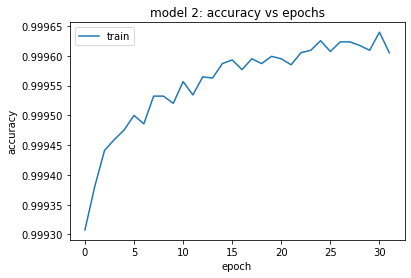

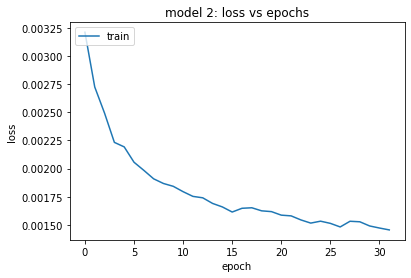

In [51]:
import matplotlib.pyplot as plt

plt.plot(model_2_history.history['accuracy'])
plt.title('model 2: accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_2_history.history['loss'])
plt.title('model 2: loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 960       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________


Conclusion-2: A seen from the model-2 performance we have achieved 99.96% accuracy (close to 100%) which means this model did overfit the dataset.